<a href="https://colab.research.google.com/github/JosiasRuiz/MarriotMNA/blob/main/rekognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q boto3

In [ ]:
import boto3
from PIL import Image, ImageDraw, ImageFont

In [ ]:
rekognition = boto3.client('rekognition', aws_access_key_id='',
aws_secret_access_key='',
                           region_name='us-east-1')
image_name ="persona.png"
with open(image_name, 'rb') as image_data:
        response_content = image_data.read()

rekognition_response = rekognition.detect_faces(
        Image={'Bytes': response_content}, Attributes=['ALL'])

In [ ]:
image = Image.open(image_name)
image_width, image_height = image.size
draw = ImageDraw.Draw(image)

line_width = 3
for item in rekognition_response.get('FaceDetails'):
    bounding_box = item['BoundingBox']
    width = image_width * bounding_box['Width']
    height = image_height * bounding_box['Height']
    left = image_width * bounding_box['Left']
    top = image_height * bounding_box['Top']

    left = int(left)
    top = int(top)
    width = int(width) + left
    height = int(height) + top

    draw.rectangle(((left, top), (width, height)),
                    outline='red', width=line_width)

    face_emotion_confidence = 0
    face_emotion = None
    for emotion in item.get('Emotions'):
        if emotion.get('Confidence') >= face_emotion_confidence:
            face_emotion_confidence = emotion['Confidence']
            face_emotion = emotion.get('Type')

    draw.text((left, top), face_emotion, 'white')

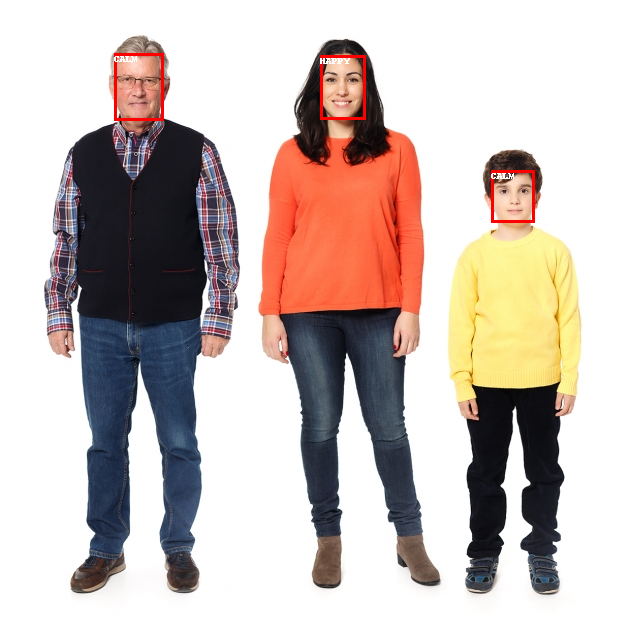

In [ ]:
image